

 # **1.Data Loading and Inspection**

# **a)Load the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **b)Read excel file in python environment**

In [2]:

data = pd.read_excel('/content/Electronic.xlsx')

In [3]:
data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


In [4]:
#BASIC INFORMATION OF DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [5]:
#Shape of data
data.shape

(5000, 15)

In [6]:
data_types = data.dtypes
print(data_types)

Age                       int64
Items Purchased           int64
Total Spent             float64
Discount (%)            float64
Satisfaction Score      float64
Warranty Extension        int64
Gender                   object
Region                   object
Product Category         object
Payment Method           object
Revenue                 float64
Store Rating            float64
Loyalty Score           float64
Membership Status       float64
Preferred Visit Time     object
dtype: object


In [7]:
#Disaplay numerical details of all columns
data.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235392,1.000000


In [8]:
#Checking Null values
data.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


# **2.Data Cleaning**


In [9]:
#Handle missing values
# fillining gender details
data["Gender"].fillna("Not Available", inplace=True)

<ipython-input-9-d6a193216b22>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].fillna("Not Available", inplace=True)


In [10]:
data['Age']

,Age
0,56
1,69
2,46
3,32
4,60
...,...
4995,24
4996,66
4997,26
4998,53


In [11]:
##duplicates
data.duplicated().sum()##checking duplicate rows

0

<Axes: xlabel='Membership Status'>

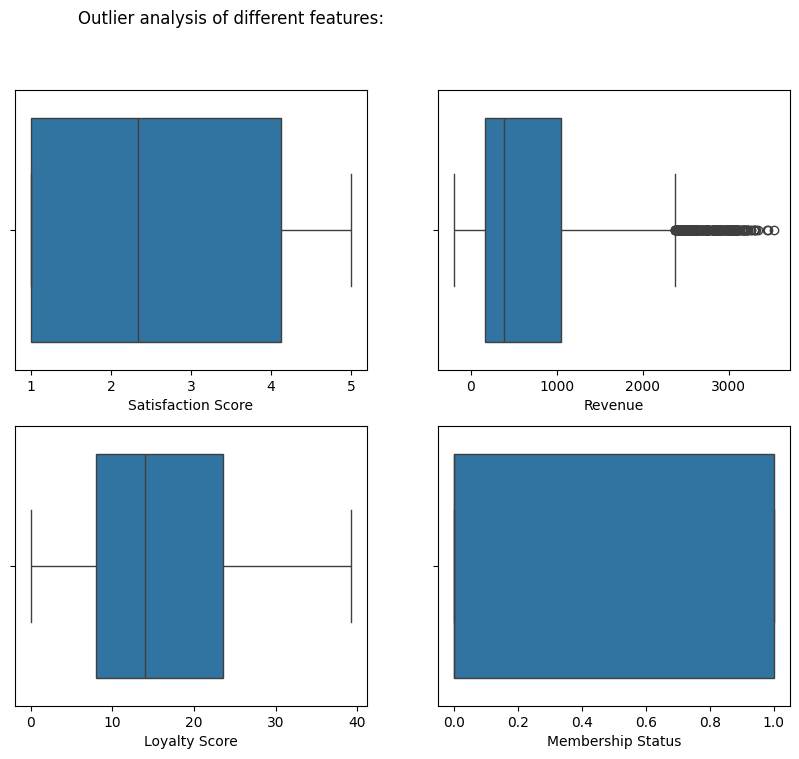

In [12]:
#outlier Analysis

plt.figure(figsize=(10,8))
plt.suptitle("Outlier analysis of different features: ", ha = "right")
plt.subplot(2,2,1)
sns.boxplot(x = data["Satisfaction Score"])

plt.subplot(2,2,2)
sns.boxplot(x = data["Revenue"])

plt.subplot(2,2,3)
sns.boxplot(x = data["Loyalty Score"])

plt.subplot(2,2,4)
sns.boxplot(x = data["Membership Status"])

In [13]:
#Adding loyalty_category column based on loyalty score.

def categorize_loyalty(score):
    if score < 15:
        return 0
    elif score < 25:
        return 1
    else:
        return 2

# Apply the categorization
data['loyalty_category'] = data['Loyalty Score'].apply(categorize_loyalty)

data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,loyalty_category
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening,0
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening,2
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning,0
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon,0
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning,2


In [14]:
data[data["loyalty_category"]=='2'].shape

(0, 16)

In [15]:
print(data["loyalty_category"].value_counts())

loyalty_category
0    2651
1    1293
2    1056
Name: count, dtype: int64


In [16]:
data.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,loyalty_category
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening,0
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening,2
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning,0
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon,0
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning,2


In [17]:
#Handle missing values
#Imputation

payment_method_mode = data['Payment Method'].mode().iloc[0]
preferred_visit_time_mode = data['Preferred Visit Time'].mode().iloc[0]
store_rating_mean = data['Store Rating'].mean()
membership_status_mean = data['Membership Status'].mean()

# fill the missing values

data['Payment Method'] = data['Payment Method'].fillna(payment_method_mode)
data['Preferred Visit Time'] = data['Preferred Visit Time'].fillna(preferred_visit_time_mode)
data['Store Rating'] = data['Store Rating'].fillna(store_rating_mean)
data['Membership Status'] = data['Membership Status'].fillna(membership_status_mean)




In [18]:
data.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


In [19]:
#Standardize categorical values, such as region and product category
#Convert to Lowercase
data['Region'] = data['Region'].str.lower()
data['Product Category'] = data['Product Category'].str.lower()


In [20]:
#Normalize numerical fields like "Total Spent" and "Discount (%)"

#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


data['Total Spent'] = scaler.fit_transform(data[['Total Spent']])
data['Discount %'] = scaler.fit_transform(data[['Discount (%)']])


data.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,loyalty_category,Discount %
0,56,1,-1.384437,47.077380,1.000000,1,Male,south,accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening,0,1.505668
1,69,10,1.138687,7.985739,3.760294,1,Female,south,accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening,2,-1.371814
2,46,4,-0.748573,37.225718,1.771240,1,Male,east,laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning,0,0.780501
3,32,9,1.123068,8.227732,1.926831,0,Female,east,tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon,0,-1.354001
4,60,13,2.351393,5.000000,3.902927,0,Female,south,tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning,2,-1.591590



# **3. Exploratory Data Analysis (EDA):**

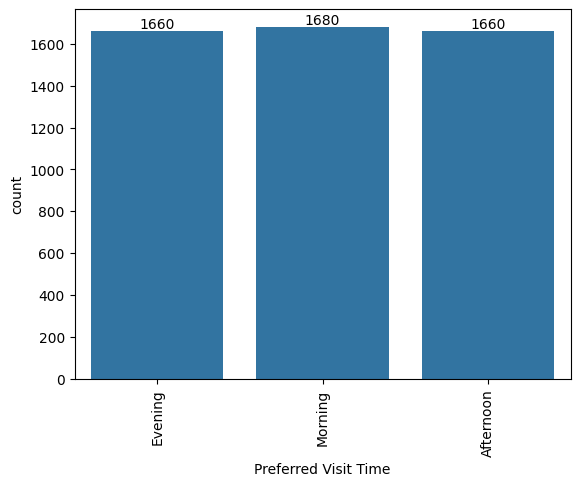

In [21]:
#Univariate Analysis
# count of workers from different Timings
ax=sns.countplot(x=data['Preferred Visit Time'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

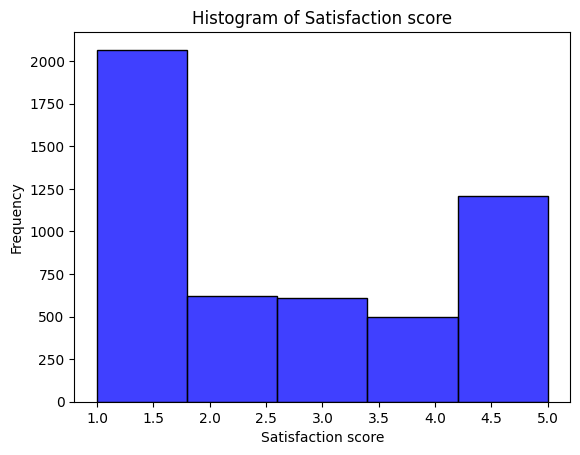

In [22]:



# Create histogram using seaborn
sns.histplot(data['Satisfaction Score'], bins=5, kde=False, color='blue')

# Create histogram

# Add title and labels
plt.title('Histogram of Satisfaction score')
plt.xlabel('Satisfaction score')
plt.ylabel('Frequency')

# Show plot
plt.show()

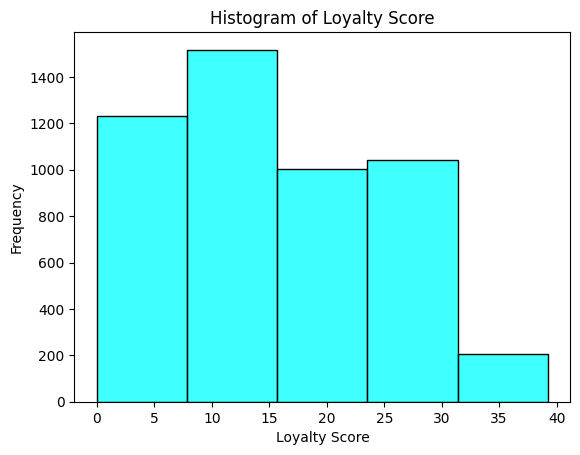

In [23]:
# Create histogram using seaborn
sns.histplot(data['Loyalty Score'], bins=5, kde=False, color='cyan')

# Create histogram

# Add title and labels
plt.title('Histogram of Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

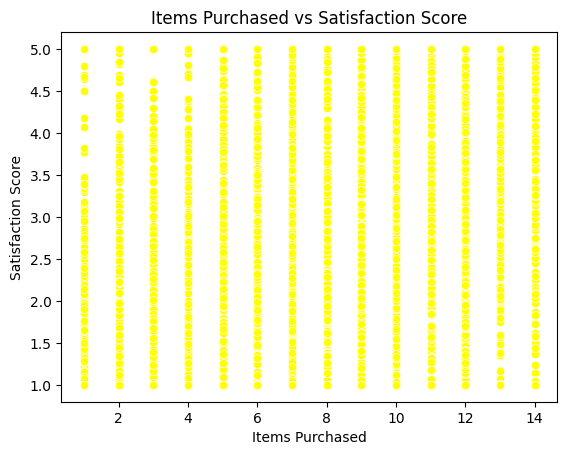

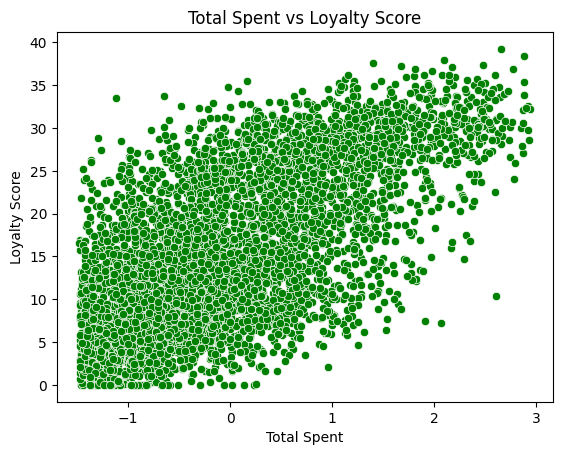

In [24]:
#Scatter plot(relationship between two numerical variables)

# Scatter plot of Items Purchased vs Satisfaction Score
sns.scatterplot(data=data, x='Items Purchased', y='Satisfaction Score', color='yellow')
plt.title('Items Purchased vs Satisfaction Score')
plt.xlabel('Items Purchased')
plt.ylabel('Satisfaction Score')
plt.show()

# Scatter plot of Total Spent vs Loyalty Score
sns.scatterplot(data=data, x='Total Spent', y='Loyalty Score', color='green')
plt.title('Total Spent vs Loyalty Score')
plt.xlabel('Total Spent')
plt.ylabel('Loyalty Score')
plt.show()

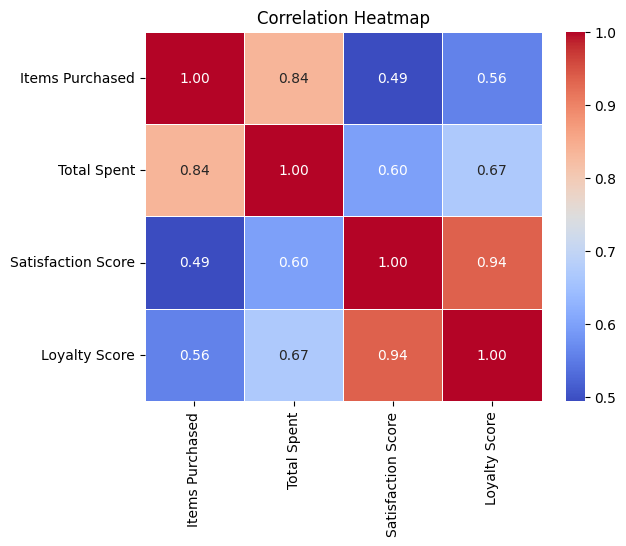

In [25]:
# Calculate the correlation matrix
corr_matrix = data[['Items Purchased', 'Total Spent', 'Satisfaction Score', 'Loyalty Score']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

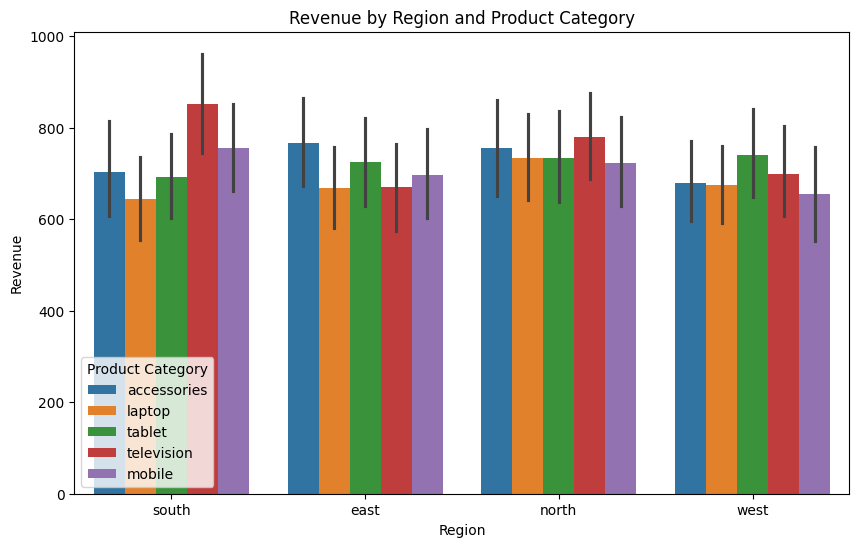

In [26]:

# Bar plot for Revenue by Region and Product Category
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Region', y='Revenue', hue='Product Category')
plt.title('Revenue by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

#Here south regions are generating the most revenue for Television product category
#this helps in understanding regional preferences.

Text(0, 0.5, 'Revenue')

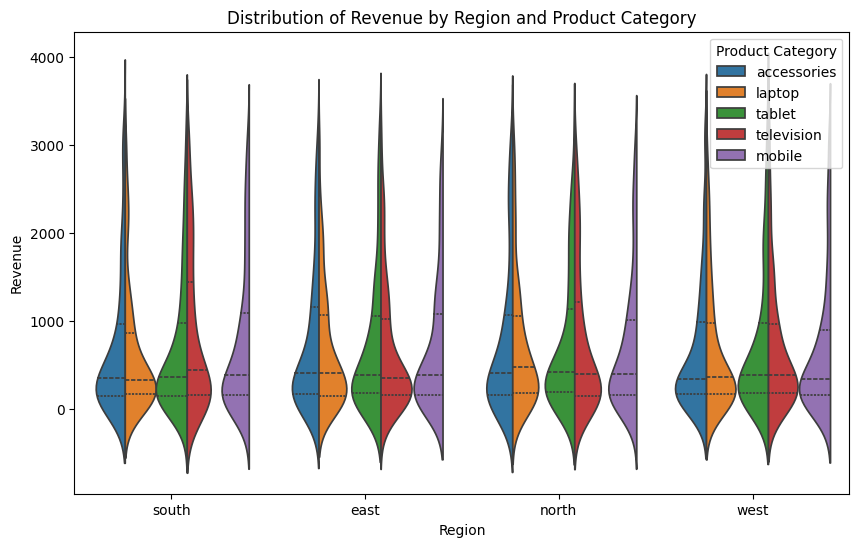

In [27]:
 #Violin Plot (Distribution of Revenue by Region and Product Category)
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Region', y='Revenue', hue='Product Category', split=True, inner="quart")
plt.title('Distribution of Revenue by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Revenue')

#It gives you an idea of how Revenue are spread across different regions.
#If the "North" region has a wide distribution for "tablets," it may indicate a large variance in Revenue (some customers buying very little, others buying a lot).
#High Revenue: Some customers in the North region may purchase multiple tablets at a high price point, leading to a significant increase in the revenue from these customers

In [28]:
data.columns


Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time',
       'loyalty_category', 'Discount %'],
      dtype='object')

Kruskal-Wallis Test: Statistic = 2.1407924838100327, p-value = 0.5437043486697137


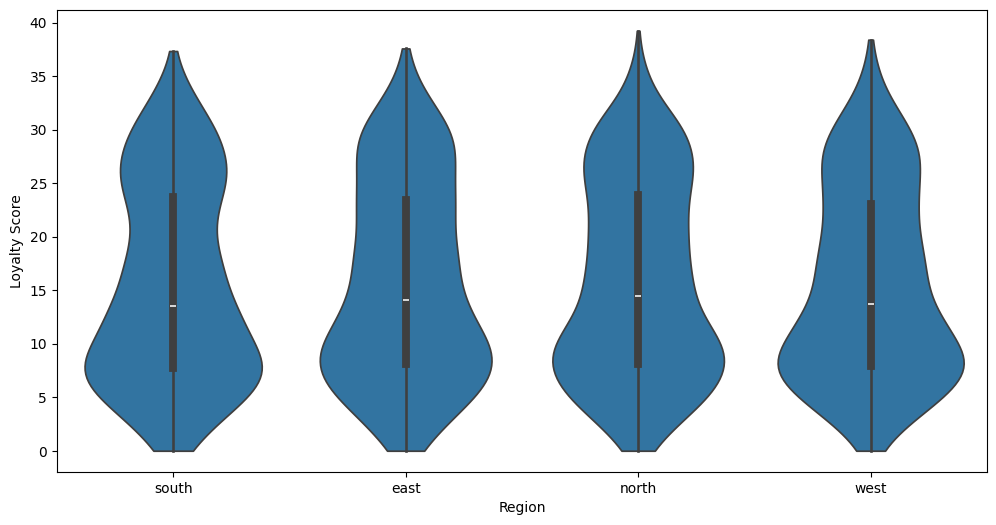

In [29]:
# violin plot for understanding the relation ships btw "Region and Loyalty Score"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.

from scipy.stats import kruskal




plt.figure(figsize=(12,6))
sns.violinplot(data=data, y="Loyalty Score", x = "Region", cut=0)



# Perform Kruskal-Wallis test
loyalty_by_Region = [data['Loyalty Score'][data['Region'] == region] for region in data['Region'].unique()]
kruskal_stat, p_value = kruskal(*loyalty_by_Region)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")
#low p-value indicates rejecting null hypothesis,accepting alternate hypothesis(features depends each other)

**Inference: **
  Loaded the dataset.checked missing values.Filled missing values using imputation method.Standardized categorical values, such as region and product category.Normalized numerical fields like "Total Spent" and "Discount (%)".
  Using EDA(Exploratory Data Analysis),Analyzed the distribution of satisfaction scores, loyalty scores, and preferred visit
times.

**key findings**:

violin plot:
*  It gives you an idea of how Revenue are spread across different regions.
If the "North" region has a wide distribution for "tablets," it may indicate a large variance in Revenue (some customers buying very little, others buying a lot).
*  High Revenue: Some customers in the North region may purchase multiple tablets at a high price point, leading to a significant increase in the revenue from these customers.
* A higher value in Kruskal-Wallis Test indicates more significant difference.
*In univariate analysis of count plot of "Prefered VisitTime" ,morning time is higher than other timings.

scatterplot(Total Spent vs Loyalty Score):
*   positive correlation(when Total Spent increases,Loyalty Score increases.)
*  means that people who spent more  tend to report higher loyalty.
* points cluster together in certain areas of the plot (for example, a cluster of low "Total Spent" values with higher Loyalty scores), you might infer that some groups of customers tend to spent little but have more loyalty.

scatterplot(Items Purchased vs Satisfaction Score):
*   the points form a straight line , the relationship between "Items Purchased" and "Satisfaction Score" is linear.

heatmap of the correlation matrix:

*Loyalty Score and Satisfaction Score positively correleted highlt(0.95).
*Total Spent and Items Purchased highly positive correlated.









# **Week 2**

In [30]:
data['Spent per Item'] =np.where(data['Items Purchased'] == 0, np.nan, data['Total Spent'] / data['Items Purchased'])

In [31]:
data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,loyalty_category,Discount %,Spent per Item
0,56,1,-1.384437,47.077380,1.000000,1,Male,south,accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening,0,1.505668,-1.384437
1,69,10,1.138687,7.985739,3.760294,1,Female,south,accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening,2,-1.371814,0.113869
2,46,4,-0.748573,37.225718,1.771240,1,Male,east,laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning,0,0.780501,-0.187143
3,32,9,1.123068,8.227732,1.926831,0,Female,east,tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon,0,-1.354001,0.124785
4,60,13,2.351393,5.000000,3.902927,0,Female,south,tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning,2,-1.591590,0.180876


# **Encoding**

In [32]:
data.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time',
       'loyalty_category', 'Discount %', 'Spent per Item'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                5000 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        5000 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          5000 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     5000 non-null   float64
 14  Preferred Visit Time  5000 non-null   object 
 15  loyalty_category     

In [34]:
encode_features = data[["Gender","Region","Product Category","Payment Method","Preferred Visit Time","Satisfaction Score","Loyalty Score","loyalty_category"]]




In [35]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [36]:
gender = encoder.fit_transform(encode_features["Gender"])
encode_features["Gender"] = gender

encode_features["Region"] = encoder.fit_transform(encode_features["Region"])

encode_features["Product Category"] = encoder.fit_transform(encode_features["Product Category"])

encode_features["Payment Method"] = encoder.fit_transform(encode_features["Payment Method"])
encode_features["Preferred Visit Time"] = encoder.fit_transform(encode_features["Preferred Visit Time"])

<ipython-input-36-2aa64a448a2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encode_features["Gender"] = gender
<ipython-input-36-2aa64a448a2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encode_features["Region"] = encoder.fit_transform(encode_features["Region"])
<ipython-input-36-2aa64a448a2e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [37]:
loyalty_features=data[["Revenue","Total Spent","Satisfaction Score","Loyalty Score"]]


In [38]:
encode_values =loyalty_features.copy()

In [39]:
# will be using for encoding new loyalty prediction
prediction_values = encode_values.copy()

In [40]:
# downloading prediction_values as csv file for flask
prediction_values.to_csv("/content/prediction_values.csv")

In [41]:
# downloading encoded values of prediction_values as csv file for scaling in flask
encode_values.to_csv("/content/tobe_scaled.csv")

# **Scaling**

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [63]:
x = encode_values.drop(columns="Loyalty Score")
y = encode_values[["Loyalty Score"]]

In [64]:
#y = y.reshape(-1,1)
x1 = x.copy()

x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)
x[3]

array([ 0.13662797,  1.12306777, -0.47173062])

In [45]:

#splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

In [46]:
encode_values.head()

,Revenue,Total Spent,Satisfaction Score,Loyalty Score
0,149.252145,-1.384437,1.000000,3.597133
1,1485.524222,1.138687,3.760294,25.764903
2,85.550131,-0.748573,1.771240,7.022399
3,824.118724,1.123068,1.926831,7.635412
4,2463.590392,2.351393,3.902927,29.461119


In [47]:
# Feature Importance

data.columns


Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time',
       'loyalty_category', 'Discount %', 'Spent per Item'],
      dtype='object')

In [48]:
columns = [

    'Age',
    'Items Purchased',
    'Total Spent',
    'Discount (%)',
    'Satisfaction Score',
    'Warranty Extension',
    'Revenue',
    'Store Rating',
    'Loyalty Score',
    'Membership Status',
    'Discount %',
    "Spent per Item"




]
data_selected = data[columns]

In [49]:
#Correlation Matrix
corr_matrix = data_selected.corr()
corr_matrix

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status,Discount %,Spent per Item
Age,1.000000,-0.005522,-0.003212,0.000439,0.000331,-0.034065,-0.006344,-0.023029,0.009317,0.000911,0.000439,0.003772
Items Purchased,-0.005522,1.000000,0.836032,-0.853837,0.494572,0.064381,0.674361,0.017564,0.557782,0.006671,-0.853837,0.748281
Total Spent,-0.003212,0.836032,1.000000,-0.979015,0.597239,0.121439,0.882421,0.013547,0.669716,-0.000641,-0.979015,0.710610
Discount (%),0.000439,-0.853837,-0.979015,1.000000,-0.589436,-0.086038,-0.829426,-0.013681,-0.659179,0.004502,1.000000,-0.749061
Satisfaction Score,0.000331,0.494572,0.597239,-0.589436,1.000000,0.062950,0.786229,0.010493,0.935086,0.026244,-0.589436,0.413600
Warranty Extension,-0.034065,0.064381,0.121439,-0.086038,0.062950,1.000000,0.130036,0.016729,0.076038,0.010960,-0.086038,0.034942
Revenue,-0.006344,0.674361,0.882421,-0.829426,0.786229,0.130036,1.000000,0.010915,0.808505,0.014835,-0.829426,0.506798
Store Rating,-0.023029,0.017564,0.013547,-0.013681,0.010493,0.016729,0.010915,1.000000,0.007269,0.001247,-0.013681,0.018640
Loyalty Score,0.009317,0.557782,0.669716,-0.659179,0.935086,0.076038,0.808505,0.007269,1.000000,0.020135,-0.659179,0.464651
Membership Status,0.000911,0.006671,-0.000641,0.004502,0.026244,0.010960,0.014835,0.001247,0.020135,1.000000,0.004502,-0.010345


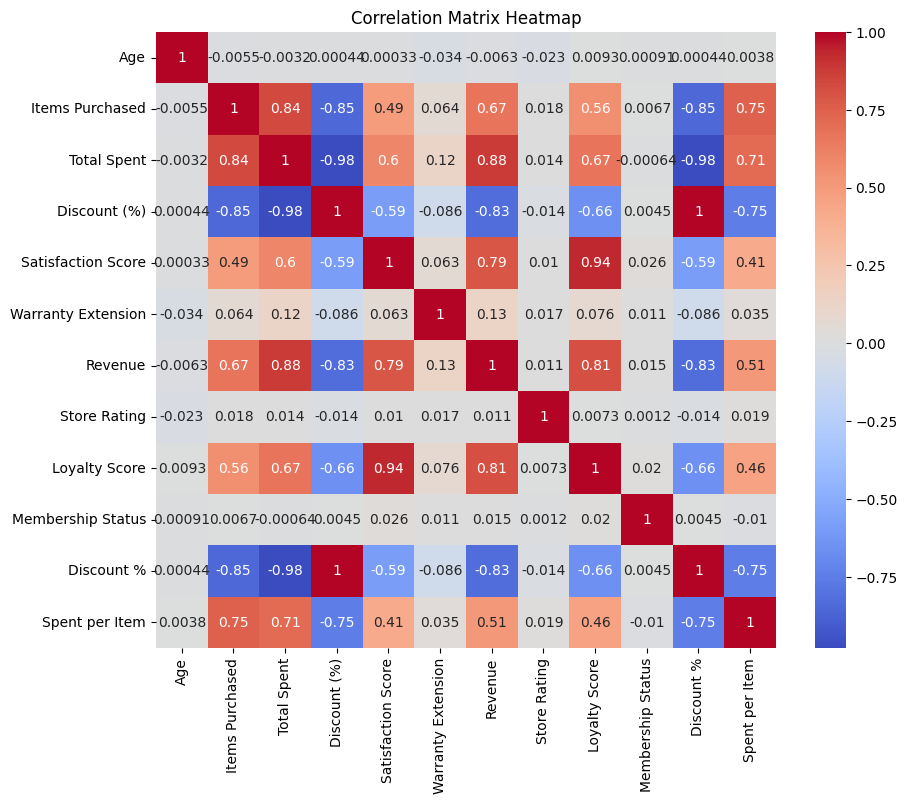

In [50]:
#Heatmap of Correlation Matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Modelling**

In [51]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R-squared (R²)
r2 = r2_score(y_test, lr_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lr_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#best model



R-squared (R²): 0.8934
Mean Absolute Error (MAE): 2.3817
Mean Squared Error (MSE): 8.7584
Root Mean Squared Error (RMSE): 2.9595


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
x = encode_values.drop(columns="Loyalty Score")
y = encode_values[["Loyalty Score"]]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              Feature  Importance
2  Satisfaction Score    0.894813
1         Total Spent    0.053270
0             Revenue    0.051917


In [53]:
#Features such as Payment Method, Region, Product Category, Preferred Visit Time, and Gender have very low importance.

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(x_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, rf_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-squared (R²): 0.8732
Mean Absolute Error (MAE): 2.5929
Mean Squared Error (MSE): 10.4712
Root Mean Squared Error (RMSE): 3.2359


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(x_test)

# Make predictions
gb_predictions = gb_model.predict(x_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, gb_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, gb_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, gb_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#This ths the best model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


R-squared (R²): 0.8912
Mean Absolute Error (MAE): 2.4087
Mean Squared Error (MSE): 8.9838
Root Mean Squared Error (RMSE): 2.9973


In [56]:
# Get feature importances from the trained model
importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

              Feature  Importance
2  Satisfaction Score    0.958735
0             Revenue    0.024001
1         Total Spent    0.017264


In [57]:
from sklearn.svm import SVR

# Train an SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(x_test)

# Make predictions
svr_predictions = svr_model.predict(x_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, svr_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, svr_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, svr_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared (R²): 0.7217
Mean Absolute Error (MAE): 3.7454
Mean Squared Error (MSE): 22.9807
Root Mean Squared Error (RMSE): 4.7938


In [58]:
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(x_test)


# Calculate R-squared (R²)
r2 = r2_score(y_test, xgb_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, xgb_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, xgb_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R-squared (R²): 0.8763
Mean Absolute Error (MAE): 2.5771
Mean Squared Error (MSE): 10.2154
Root Mean Squared Error (RMSE): 3.1961


In [59]:
data.loc[37]

,37
Age,68
Items Purchased,13
Total Spent,0.124226
Discount (%),23.703136
Satisfaction Score,4.292109
Warranty Extension,1
Gender,Male
Region,north
Product Category,accessories
Payment Method,Cash


In [60]:
  # prediction  1

loyalty_prediction = {
    "Revenue": 1063.576628,
    "Total Spent":0.124226,
    "Satisfaction Score": 4.292109


}


loyalty_predictdf = pd.DataFrame([loyalty_prediction])






scaler.fit_transform(x1)
loyalty_predict_scaled = scaler.transform(loyalty_predictdf)

In [61]:
x

,Revenue,Total Spent,Satisfaction Score
0,149.252145,-1.384437,1.000000
1,1485.524222,1.138687,3.760294
2,85.550131,-0.748573,1.771240
3,824.118724,1.123068,1.926831
4,2463.590392,2.351393,3.902927
...,...,...,...
4995,-64.457793,-1.317584,1.000000
4996,138.772917,-0.459780,1.000000
4997,1010.219124,1.611441,2.324783
4998,1114.585926,0.106805,5.000000


In [65]:
#original scaled data
x[37]

array([0.44492509, 0.12422623, 1.07093465])

In [66]:
# scaled data for new candidate prediction
loyalty_predict_scaled

array([[0.44492509, 0.124226  , 1.07093488]])

In [67]:
prediction =lr_model.predict(loyalty_predict_scaled)

# Print the prediction
print("Predicted Result:", prediction[0])

Predicted Result: [23.96358333]


In [68]:
loyalty_predictdf

,Revenue,Total Spent,Satisfaction Score
0,1063.576628,0.124226,4.292109


In [69]:
encode_values.loc[2361]

,2361
Revenue,286.018220
Total Spent,-0.394128
Satisfaction Score,1.000000
Loyalty Score,7.172687


In [70]:
# prediction 2

new_loyalty_data = {
    "Revenue": 1065.576628,
    "Total Spent":0.144226,
    "Satisfaction Score": 5.292109
}

# Convert input data to DataFrame
new_loyalty_df = pd.DataFrame([new_loyalty_data])

In [71]:
# Scale numerical features
new_loyalty_features_scaled = scaler.transform(new_loyalty_df)  # Assuming 'scaler' is the trained StandardScaler

# Make predictions
new_loyalty_result = lr_model.predict(new_loyalty_features_scaled)

# Print the prediction
print("Predicted Result for the new loyalty features:", new_loyalty_result)

Predicted Result for the new loyalty features: [[28.92183663]]


In [72]:
new_loyalty_df

,Revenue,Total Spent,Satisfaction Score
0,1065.576628,0.144226,5.292109


In [73]:
new_loyalty_features_scaled

array([[0.44750005, 0.144226  , 1.72314811]])

In [74]:
# pickle

import pickle

pickle.dump(lr_model,open('lr_newmodel.pkl','wb'))

In [75]:
pickled_model = pickle.load(open('lr_newmodel.pkl','rb'))

pickled_model.predict(loyalty_predict_scaled)

array([[23.96358333]])

In [76]:
# pkl files of label encoder and scalar

#label encoder
pickle.dump(encoder,open('l_encoder.pkl','wb'))

#scalar
pickle.dump(scaler,open('std_scalar.pkl','wb'))